In [1]:
%matplotlib inline 
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("C:/Users/htc/Desktop/KTLAB/Classification/Titanic Task/train.csv")
test = pd.read_csv("C:/Users/htc/Desktop/KTLAB/Classification/Titanic Task/test.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data description:
#### Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
#### Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#### Name - Name
#### Sex - Sex
#### Age - Age
#### Sibsp - Number of Siblings/Spouses Aboard
#### Parch - Number of Parents/Children Aboard
#### Ticket - Ticket Number
#### Fare - Passenger Fare
#### Cabin - Cabin
#### Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Visualization

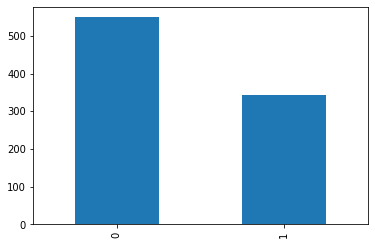

In [7]:
train["Survived"].value_counts().plot(kind="bar")


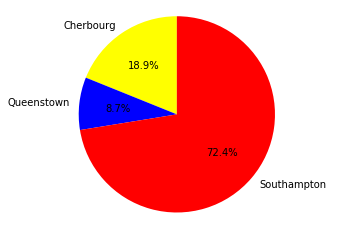

In [8]:
labels="Cherbourg","Queenstown","Southampton"
sizes=[sum(train["Embarked"]=="C"),sum(train["Embarked"]=="Q"),sum(train["Embarked"]=="S")]
colors=["yellow","blue","red"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%',startangle=90)
 
plt.axis('equal')
plt.show()

In [9]:
#Comparing survival rates among different variables
def survival_stacked_bar(variable):
    Died=train[train["Survived"]==0][variable].value_counts()/len(train["Survived"]==0)
    Survived=train[train["Survived"]==1][variable].value_counts()/len(train["Survived"]==1)
    data=pd.DataFrame([Died,Survived])
    data.index=["Died","Survived"]
    data.plot(kind="bar",stacked=True,title="Percentage")
    return data.head()

,male,female
Died,0.525253,0.090909
Survived,0.122334,0.261504


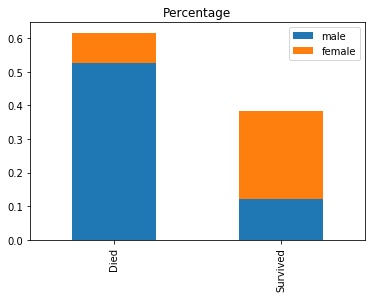

In [10]:
survival_stacked_bar("Sex")

,1,2,3
Died,0.089787,0.108866,0.417508
Survived,0.152637,0.097643,0.133558


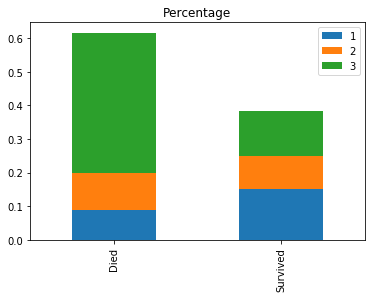

In [11]:
survival_stacked_bar("Pclass")

,0,1,2,3,4,5,8
Died,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856
Survived,0.235690,0.125701,0.014590,0.004489,0.003367,NaN,NaN


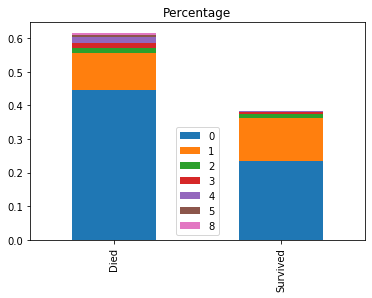

In [12]:
survival_stacked_bar("SibSp")

,0,1,2,3,4,5,6
Died,0.499439,0.059484,0.044893,0.002245,0.004489,0.004489,0.001122
Survived,0.261504,0.072952,0.044893,0.003367,NaN,0.001122,NaN


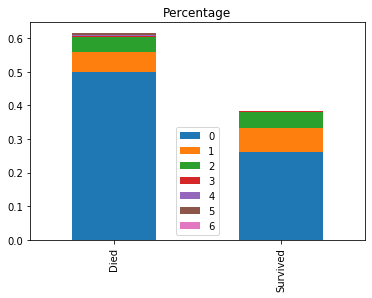

In [13]:
survival_stacked_bar("Parch")

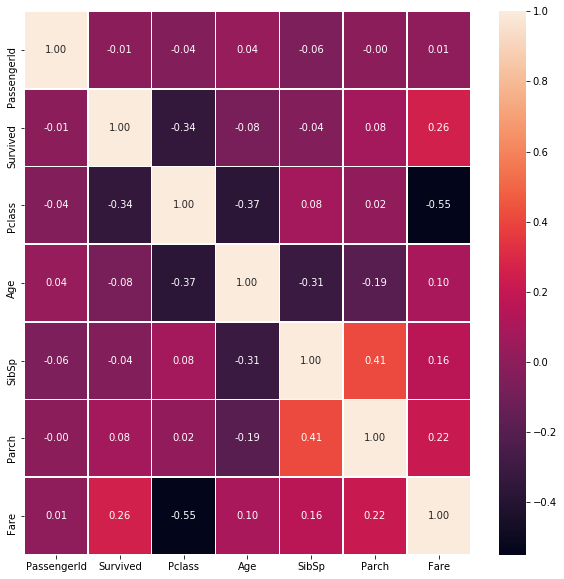

In [14]:
# Heatmap for all variables
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

,0,1
Died,0.090909,0.525253
Survived,0.261504,0.122334


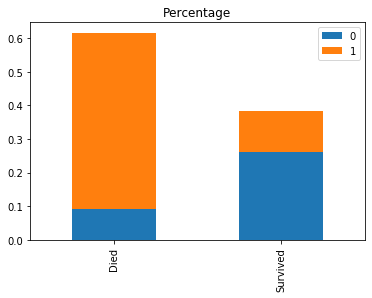

In [15]:
# Sex Mapping and Encoding
sex_map={"male":1,"female":0}
train["Sex"]=train["Sex"].map(sex_map)
test["Sex"]=test["Sex"].map(sex_map)
survival_stacked_bar("Sex")

In [16]:
#Name/Title mapping
train.insert(value=train.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")
test.insert(value=test.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=11,column="Title")


In [17]:
#Assign new title
title_map={"Capt": "Officer",
            "Col": "Officer",
            "Major": "Officer",
            "Jonkheer": "Royalty",
            "Don": "Royalty",
            "Sir" : "Royalty",
            "Dr": "Officer",
            "Rev": "Officer",
            "the Countess":"Royalty",
            "Dona": "Royalty",
            "Mme":  "Mrs",
            "Mlle": "Miss",
            "Ms": "Mrs",
            "Mr" : "Mr",
            "Mrs" : "Mrs",
            "Miss" : "Miss",
            "Master" : "Master",
            "Lady" : "Royalty"}
train["Title"]=train.Title.map(title_map)
test["Title"]=test.Title.map(title_map)

In [18]:
# Encoding Title
title_map_2={'Mr':1, 
           'Mrs':1, 
           'Miss':1,
           'Master':2,
           'Officer':3,
           'Royalty':4}
train["Title"]=train["Title"].map(title_map_2)
test["Title"]=test["Title"].map(title_map_2)


In [19]:
# Check for missing values
for i in train.columns:
    print (i + ": "+str(sum(train[i].isnull()))+" missing values")

PassengerId: 0 missing values
Survived: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 177 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 0 missing values
Cabin: 687 missing values
Embarked: 2 missing values
Title: 0 missing values


In [20]:
#Dealing with missing values
train_set_1=train.groupby(["Pclass","SibSp"])
train_set_1_median=train_set_1.median()
train_set_1_median

PassengerId  Survived  Sex   Age  Parch      Fare  Title
Pclass SibSp                                                          
1      0            476.0       1.0  1.0  37.0    0.0   39.6000    1.0
       1            485.0       1.0  0.0  38.0    0.0   79.2000    1.0
       2            572.0       1.0  0.0  44.0    0.0  133.6500    1.0
       3             89.0       1.0  0.0  23.0    2.0  263.0000    1.0
2      0            407.0       0.0  1.0  30.0    0.0   13.0000    1.0
       1            451.0       1.0  0.0  29.0    1.0   26.0000    1.0
       2            565.5       0.5  1.0  23.5    1.0   39.0000    1.0
       3            727.0       1.0  0.0  30.0    0.0   21.0000    1.0
3      0            472.0       0.0  1.0  26.0    0.0    7.8958    1.0
       1            372.0       0.0  1.0  25.0    0.0   15.5500    1.0
       2            334.0       0.0  1.0  19.5    0.0   19.2583    1.0
       3            302.5       0.0  0.0   6.0    1.0   25.4667    1.0
       4            264.5       0.0  1.0   6.5    1.5   31.2750    2.0
       5            387.0       0.0  1.0  11.0    2.0   46.9000    2.0
       8            325.0       0.0  1.0   NaN    2.0   69.5500    1.0

In [21]:
# Check for missing values
for i in test.columns:
    print (i + ": "+str(sum(test[i].isnull()))+" missing values")

PassengerId: 0 missing values
Pclass: 0 missing values
Name: 0 missing values
Sex: 0 missing values
Age: 86 missing values
SibSp: 0 missing values
Parch: 0 missing values
Ticket: 0 missing values
Fare: 1 missing values
Cabin: 327 missing values
Embarked: 0 missing values
Title: 0 missing values


In [22]:
#Dealing with missing values
test_set_1=test.groupby(["Pclass","SibSp"])
test_set_1_median=test_set_1.median()
test_set_1_median

PassengerId  Sex   Age  Parch       Fare  Title
Pclass SibSp                                                 
1      0           1088.0  1.0  39.0    0.0   42.50000    1.0
       1           1109.5  0.5  46.0    0.0   82.06250    1.0
       2            969.0  0.0  55.0    0.0   51.47920    1.0
       3            945.0  0.0  28.0    2.0  263.00000    1.0
2      0           1117.5  1.0  27.0    0.0   13.00000    1.0
       1           1139.0  1.0  29.0    0.0   26.00000    1.0
       2           1077.5  0.5  21.0    0.5   31.50000    1.0
3      0           1095.5  1.0  24.0    0.0    7.82920    1.0
       1           1084.0  0.0  20.0    1.0   15.24580    1.0
       2           1059.0  1.0  19.5    0.0   21.67920    1.0
       3           1281.0  1.0  29.0    1.0   21.07500    1.0
       4           1076.0  1.0  11.5    2.0   30.25625    2.0
       5           1032.0  0.0  10.0    2.0   46.90000    1.0
       8           1166.0  0.5  14.5    2.0   69.55000    1.5

In [23]:
#Fill  missing values function in Age
def fill_age(dataset,dataset_med):
    for x in range(len(dataset)):
        if dataset["Pclass"][x]==1:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[1,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[1,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[1,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[1,3]["Age"]
        elif dataset["Pclass"][x]==2:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[2,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[2,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[2,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[2,3]["Age"]
        elif dataset["Pclass"][x]==3:
            if dataset["SibSp"][x]==0:
                return dataset_med.loc[3,0]["Age"]
            elif dataset["SibSp"][x]==1:
                return dataset_med.loc[3,1]["Age"]
            elif dataset["SibSp"][x]==2:
                return dataset_med.loc[3,2]["Age"]
            elif dataset["SibSp"][x]==3:
                return dataset_med.loc[3,3]["Age"]
            elif dataset["SibSp"][x]==4:
                return dataset_med.loc[3,4]["Age"]
            elif dataset["SibSp"][x]==5:
                return dataset_med.loc[3,5]["Age"]
            elif dataset["SibSp"][x]==8:
                return dataset_med.loc[3]["Age"].median()

In [24]:
# Fill missing values
train["Age"]=train["Age"].fillna(fill_age(train,train_set_1_median))
test["Age"]=test["Age"].fillna(fill_age(test,test_set_1_median))

In [25]:
# Fill missing values in Cabin
train["Cabin"]=train["Cabin"].fillna("U")
test["Cabin"]=test["Cabin"].fillna("U")
train["Cabin"]=train["Cabin"].map(lambda x: x[0])
test["Cabin"]=test["Cabin"].map(lambda x: x[0])

In [26]:
# Assign new values for Cabin
def new_cabin(dataset):
    dataset["Cabin A"]=np.where(dataset["Cabin"]=="A",1,0)
    dataset["Cabin B"]=np.where(dataset["Cabin"]=="B",1,0)
    dataset["Cabin C"]=np.where(dataset["Cabin"]=="C",1,0)
    dataset["Cabin D"]=np.where(dataset["Cabin"]=="D",1,0)
    dataset["Cabin E"]=np.where(dataset["Cabin"]=="E",1,0)
    dataset["Cabin F"]=np.where(dataset["Cabin"]=="F",1,0)
    dataset["Cabin G"]=np.where(dataset["Cabin"]=="G",1,0)
    dataset["Cabin T"]=np.where(dataset["Cabin"]=="T",1,0) 

In [27]:

new_cabin(train)
new_cabin(test)

In [28]:
# Fill missing values in Embarked by S 
train["Embarked"]=train["Embarked"].fillna("S")


In [29]:
def new_embark(dataset):
    dataset["Embarked S"]=np.where(dataset["Embarked"]=="S",1,0)
    dataset["Embarked C"]=np.where(dataset["Embarked"]=="C",1,0)  


In [30]:
new_embark(train)
new_embark(test)

In [31]:
# Fill missing values in Fare
test["Fare"]=test["Fare"].fillna(np.mean(test["Fare"]))

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    int64  
 13  Cabin A      891 non-null    int32  
 14  Cabin B      891 non-null    int32  
 15  Cabin C      891 non-null    int32  
 16  Cabin D      891 non-null    int32  
 17  Cabin E      891 non-null    int32  
 18  Cabin F      891 non-null    int32  
 19  Cabin G 

In [33]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
import scikitplot as skplt
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [34]:
# Drop useless columns
train.drop(["Name","Ticket","PassengerId","Embarked","Cabin"],inplace=True,axis=1)
test.drop(["Name","Ticket","Embarked","Cabin"],inplace=True,axis=1)
train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Cabin A,Cabin B,Cabin C,Cabin D,Cabin E,Cabin F,Cabin G,Cabin T,Embarked S,Embarked C
886,0,2,1,27.0,0,0,13.00,3,0,0,0,0,0,0,0,0,1,0
887,1,1,0,19.0,0,0,30.00,1,0,1,0,0,0,0,0,0,1,0
888,0,3,0,25.0,1,2,23.45,1,0,0,0,0,0,0,0,0,1,0
889,1,1,1,26.0,0,0,30.00,1,0,0,1,0,0,0,0,0,0,1
890,0,3,1,32.0,0,0,7.75,1,0,0,0,0,0,0,0,0,0,0


In [35]:
# We will first sort out our training and test set.
x=train.drop(["Survived"],axis=1)
y=train["Survived"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [36]:
# We will use cross validation to test our models
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# Create function to create confusion matrix and ROC Curves

In [37]:
# Caculate accuracy of model
def acc_score(model):
    return np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy"))

In [38]:
# Create confusion matrix
def confusion_matrix_model(model_used):
    cm=confusion_matrix(y_test,model_used.predict(x_test))
    col=["Predicted Dead","Predicted Survived"]
    cm=pd.DataFrame(cm)
    cm.columns=["Predicted Dead","Predicted Survived"]
    cm.index=["Actual Dead","Actual Survived"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

In [39]:
# Features selection
def importance_of_features(model):
    features = pd.DataFrame()
    features['feature'] = x_train.columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    return features.plot(kind='barh', figsize=(10,10))

In [40]:
#Create ROC curve
def plt_roc_curve(name,model,has_proba=True):
    if has_proba:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.predict_proba(x_test)[:,1])
    else:
        fpr,tpr,thresh=skplt.metrics.roc_curve(y_test,model.decision_function(x_test))
    x=fpr
    y=tpr
    auc= skplt.metrics.auc(x,y)
    plt.plot(x,y,label='ROC curve for %s ' % (name))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Support Vector Machine

In [41]:
# SVM using Rbf Kernel
SVC_rbf=SVC(kernel="rbf", C= 100,gamma = 0.001)
SVC_rbf.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(SVC_rbf)))
confusion_matrix_model(SVC_rbf)

Accuracy: 0.8048754062838569


,Predicted Dead,Predicted Survived
Actual Dead,0.83,0.17
Actual Survived,0.29,0.71


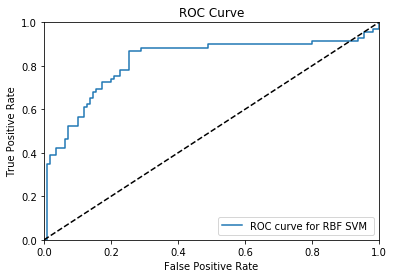

In [42]:
plt_roc_curve("RBF SVM",SVC_rbf,has_proba=False)

In [43]:
# SVM using Linear Kernel
SVC_lin=SVC(kernel="linear")
SVC_lin.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(SVC_lin)))
confusion_matrix_model(SVC_lin)

Accuracy: 0.7964148527528809


,Predicted Dead,Predicted Survived
Actual Dead,0.76,0.24
Actual Survived,0.25,0.75


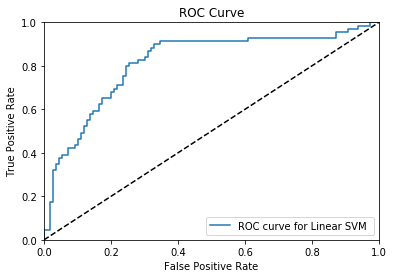

In [44]:
plt_roc_curve("Linear SVM",SVC_lin,has_proba=False)

# KNN

In [45]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(KNN)))
confusion_matrix_model(KNN)

Accuracy: 0.7009159854230277


,Predicted Dead,Predicted Survived
Actual Dead,0.85,0.15
Actual Survived,0.39,0.61


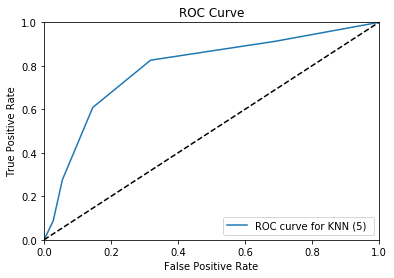

In [46]:
plt_roc_curve("KNN (5)",KNN,has_proba=True)

# Decision Tree

In [47]:
Dec_tree=DecisionTreeClassifier(max_depth=4,random_state=5)
Dec_tree.fit(x_train,y_train)

print("Accuracy: " + str(acc_score(Dec_tree)))
confusion_matrix_model(Dec_tree)

Accuracy: 0.8259135230966217


,Predicted Dead,Predicted Survived
Actual Dead,0.92,0.08
Actual Survived,0.33,0.67


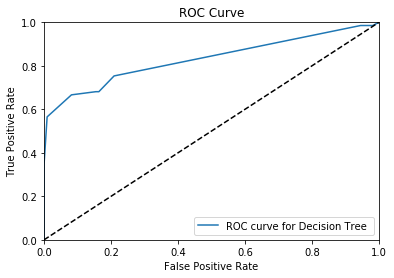

In [48]:
plt_roc_curve("Decision Tree",Dec_tree,has_proba=True)

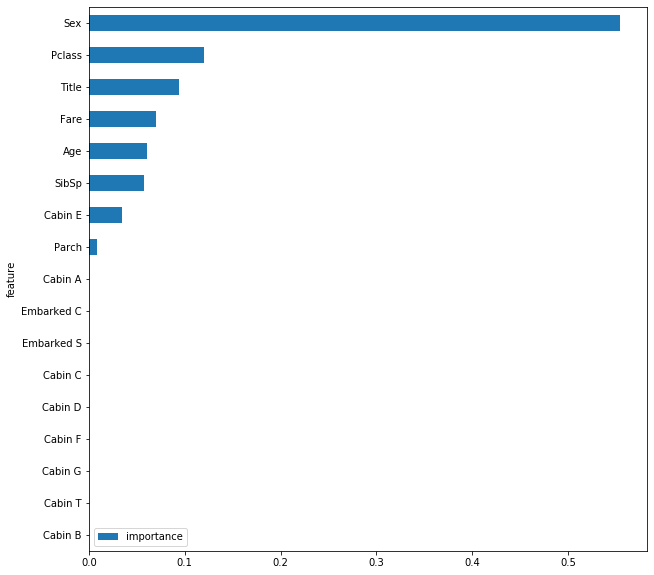

In [49]:
importance_of_features(Dec_tree)

# Random Forest 

In [50]:
ranfor = RandomForestClassifier(n_estimators=50, max_features='sqrt',max_depth=6,random_state=10)
ranfor = ranfor.fit(x_train,y_train)
print("Accuracy: " + str(acc_score(ranfor)))
confusion_matrix_model(ranfor)

Accuracy: 0.8315571752191471


,Predicted Dead,Predicted Survived
Actual Dead,0.93,0.07
Actual Survived,0.30,0.70


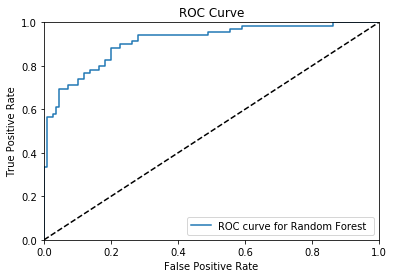

In [51]:
plt_roc_curve("Random Forest",ranfor,has_proba=True)

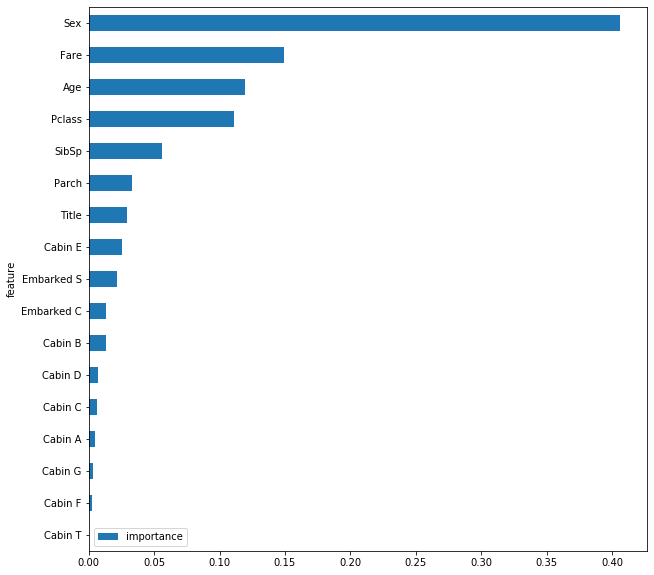

In [52]:
importance_of_features(ranfor)

# Naive Bayes

In [53]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print("Accuracy: " + str(acc_score(gnb)))
confusion_matrix_model(gnb)

Accuracy: 0.7316950654978824


,Predicted Dead,Predicted Survived
Actual Dead,0.78,0.22
Actual Survived,0.22,0.78


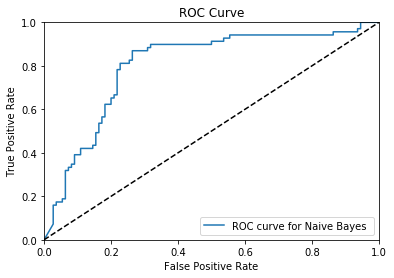

In [54]:
plt_roc_curve("Naive Bayes",gnb,has_proba=True)

# Result

In [55]:
Classifiers=["Support Vector Machine (RBF)","Support Vector Machine (Linear)","K-Nearest Neighbours","Decision Tree","Random Forest","Naive Bayes"]
Acc=[acc_score(x) for x in [SVC_rbf,SVC_lin,KNN,Dec_tree,ranfor,gnb]]
cols=["Classifier","Accuracy"]
results = pd.DataFrame(columns=cols)
results["Classifier"]=Classifiers
results["Accuracy"]=Acc
results

,Classifier,Accuracy
0,Support Vector Machine (RBF),0.804875
1,Support Vector Machine (Linear),0.796415
2,K-Nearest Neighbours,0.700916
3,Decision Tree,0.825914
4,Random Forest,0.831557
5,Naive Bayes,0.731695


# Output

In [56]:
pred_test=SVC_rbf.predict(test.drop("PassengerId",axis=1).copy())
submission=pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred_test})
submission.to_csv("submission_rbf.csv",index=False)

In [57]:
pred_test=SVC_lin.predict(test.drop("PassengerId",axis=1).copy())
submission=pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred_test})
submission.to_csv("submission_lin.csv",index=False)

In [58]:
pred_test=KNN.predict(test.drop("PassengerId",axis=1).copy())
submission=pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred_test})
submission.to_csv("submission_knn.csv",index=False)

In [59]:
pred_test=Dec_tree.predict(test.drop("PassengerId",axis=1).copy())
submission=pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred_test})
submission.to_csv("submission_dec.csv",index=False)

In [60]:
pred_test=ranfor.predict(test.drop("PassengerId",axis=1).copy())
submission=pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred_test})
submission.to_csv("submission_rand.csv",index=False)

In [61]:
pred_test=gnb.predict(test.drop("PassengerId",axis=1).copy())
submission=pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": pred_test})
submission.to_csv("submission_gnb.csv",index=False)